# Geographical Visualization

As we have seen, there are many geographical differences in behaviors of principals, socio-economic variables and Invalsi results. It is nice to visualize them on a map to grasp the main effects and intuitively decide where to direct the analysis, both on a national and regional perspective.

To see the difference for one variable, just call the plot_variable function with as input the variable's name as a string.


In [2]:
import sys
import geopandas as gpd
import pandas as pd
italy = gpd.read_file('../Data/italian-maps-shapefiles-master/italy-with-regions/reg2011_g.shp')
df = pd.read_csv('../Data/gppp.csv')

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline
pd.set_option('display.max_columns', None)

<AxesSubplot:>

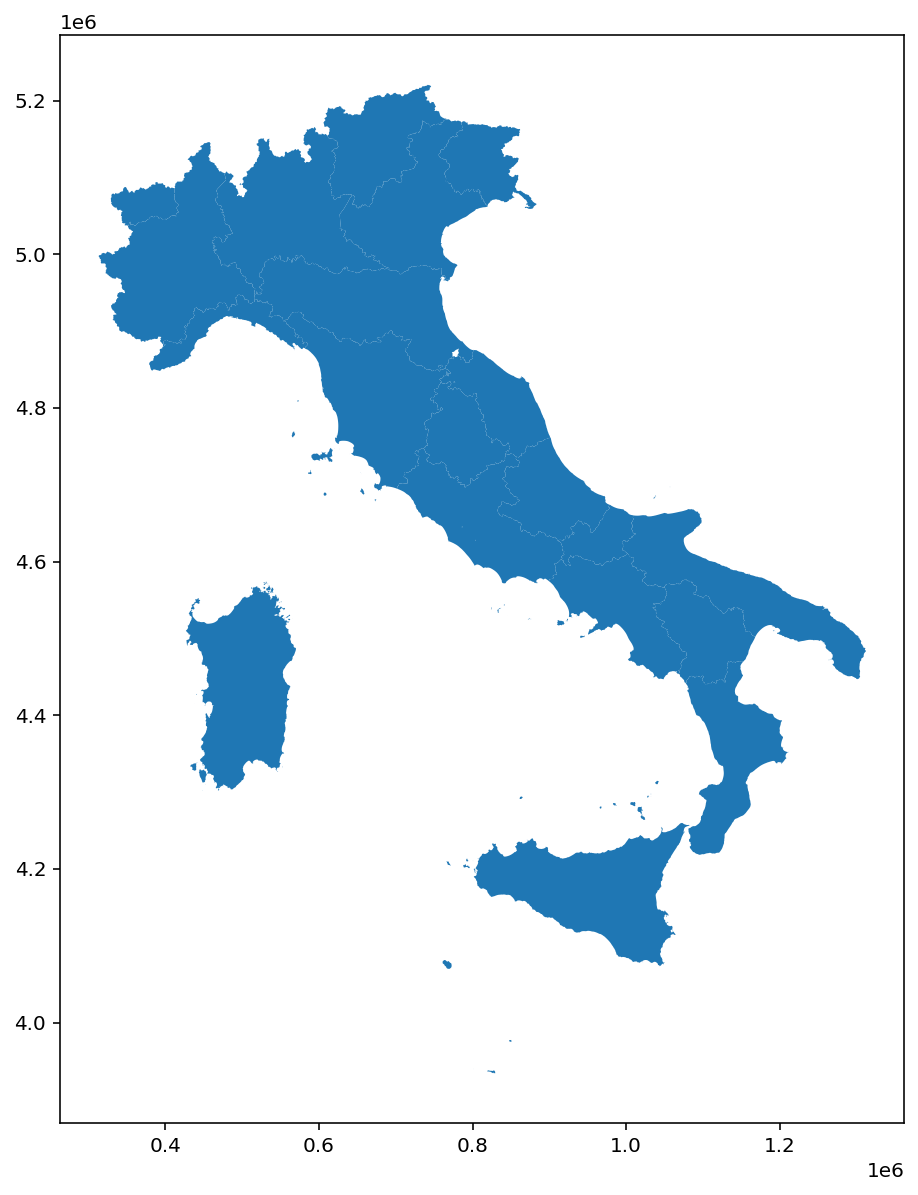

In [76]:
italy.plot(figsize=(10, 10))

Some regions are encoded differently, therefore we modify their names in the geopandas dataframe.

In [77]:
%%capture
italy['NOME_REG'][1] = "VALLE D'AOSTA"
italy['NOME_REG'][3] = "TRENTINO-ALTO ADIGE"
italy['NOME_REG'][5] = "FRIULI-VENEZIA GIULIA"

In [78]:
df = df[df['Fattore_correzione']> 0.85]

In [79]:
df.groupby(by = ['Nome_reg']).count()['cod_scu_anonimo']

Nome_reg
Abruzzo                        23
Basilicata                     20
Calabria                       27
Campania                       47
Emilia-Romagna                 37
Friuli-Venezia Giulia          32
Lazio                          43
Liguria                        31
Lombardia                      70
Marche                         38
Molise                         13
Piemonte                       22
Prov. Aut. Bolzano (l. it.)    12
Prov. Aut. Trento              27
Puglia                         28
Sardegna                       16
Sicilia                        31
Toscana                        25
Umbria                         17
Valle d'Aosta                  15
Veneto                         46
Name: cod_scu_anonimo, dtype: int64

Simple function that plots the figure and proceeds to save it in the folder. First, it gathers data from Prov. Aut. Bolzano and Trento in order to build data for Trentino-Alto Adige, hten it plots the data on Italy.

In [96]:
import matplotlib.pyplot as plt
import numpy as np

def plot_variable(string):
    regioni = df.groupby(by = ['Nome_reg']).mean()[string]
    regioni.index = regioni.index.str.upper()
    indice = regioni.index.tolist()
    regioni['TRENTINO-ALTO ADIGE'] = np.nanmean([regioni['PROV. AUT. BOLZANO (L. IT.)'], regioni['PROV. AUT. TRENTO']])
    regioni.drop(labels = ['PROV. AUT. BOLZANO (L. IT.)',  'PROV. AUT. TRENTO'], inplace = True)
    regioni = pd.DataFrame(regioni)
    merge = italy.merge(regioni, left_on = 'NOME_REG', right_index = True)
    fig, ax = plt.subplots(1, figsize=(10, 10))
    col = string
    
    ax.set_title(
    col, 
    fontdict={'fontsize':'25', 'fontweight':3}, 
    color='Black', 
    fontfamily='monospace')

    merge.plot(
    ax=ax,
    column=col,
    cmap='Blues',
    #vmin = 54,
    legend=True,
    categorical=False
    )
    
    plt.savefig(col + '.png')


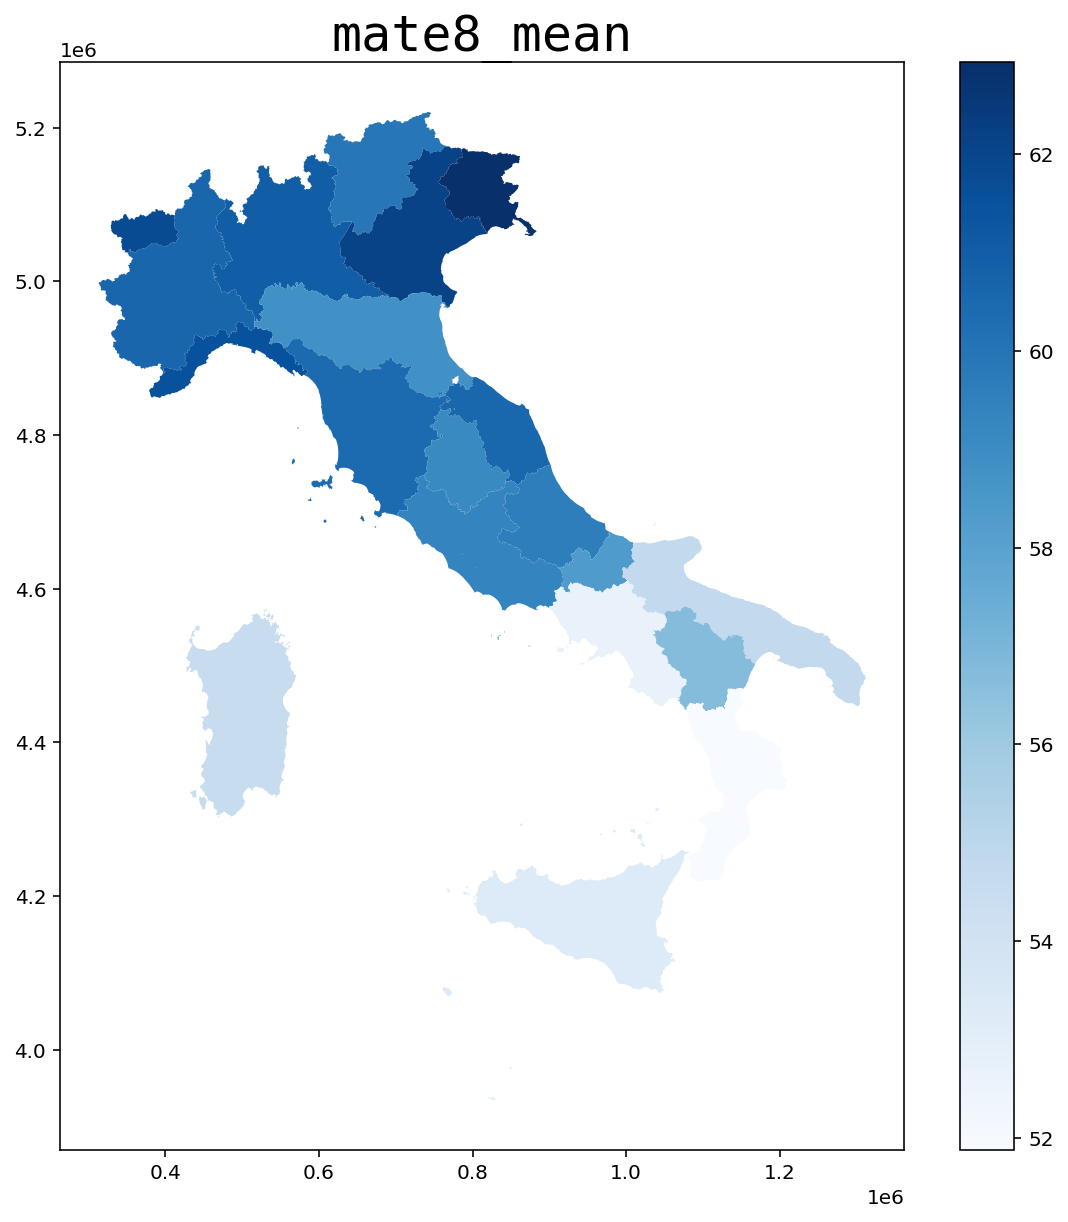

In [97]:
plot_variable('mate8_mean')

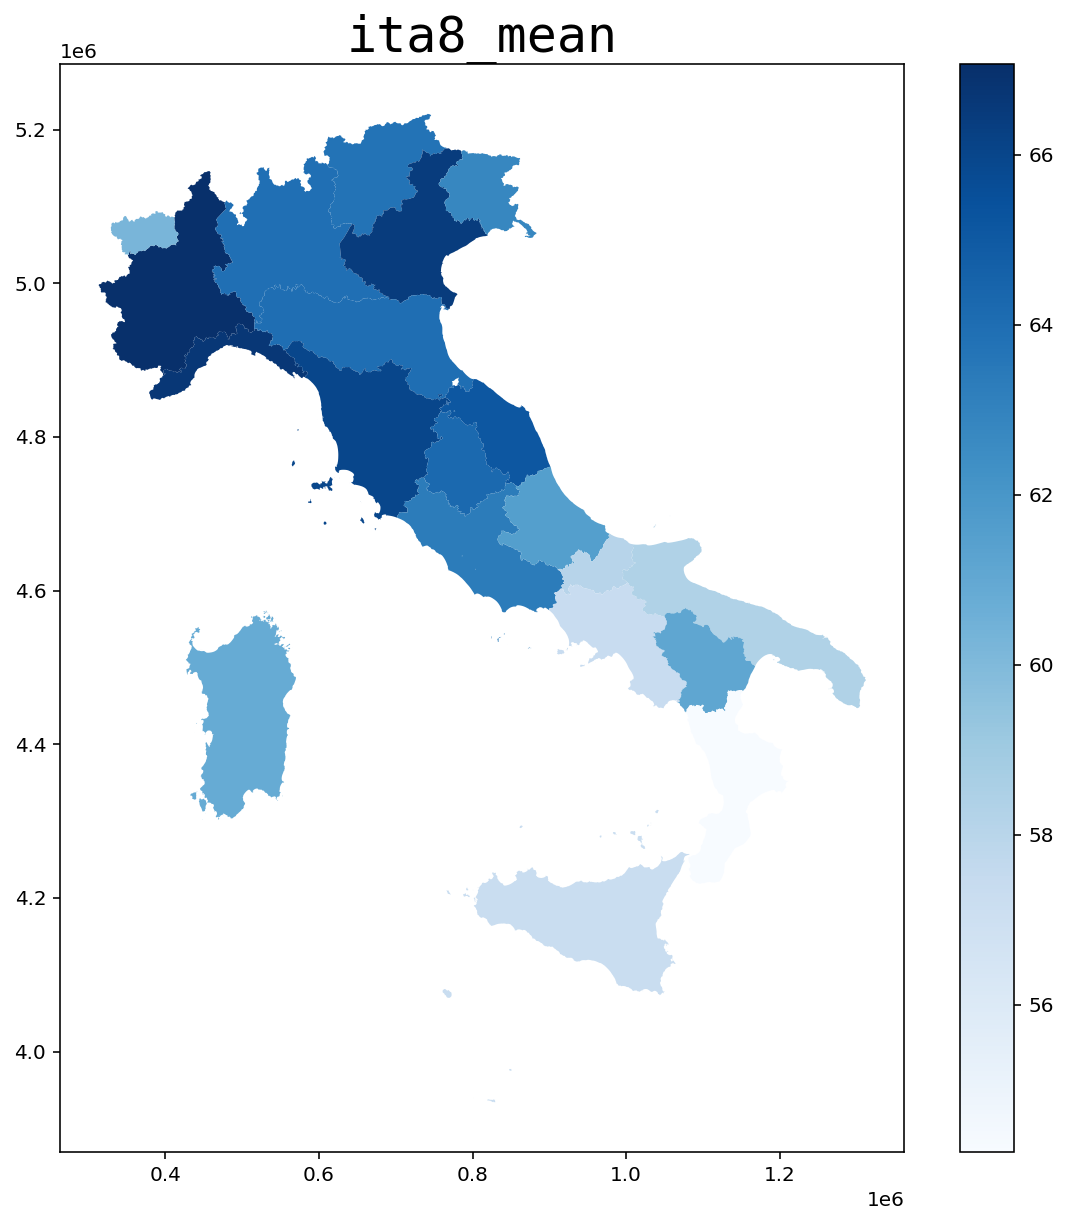

In [98]:
plot_variable('ita8_mean')

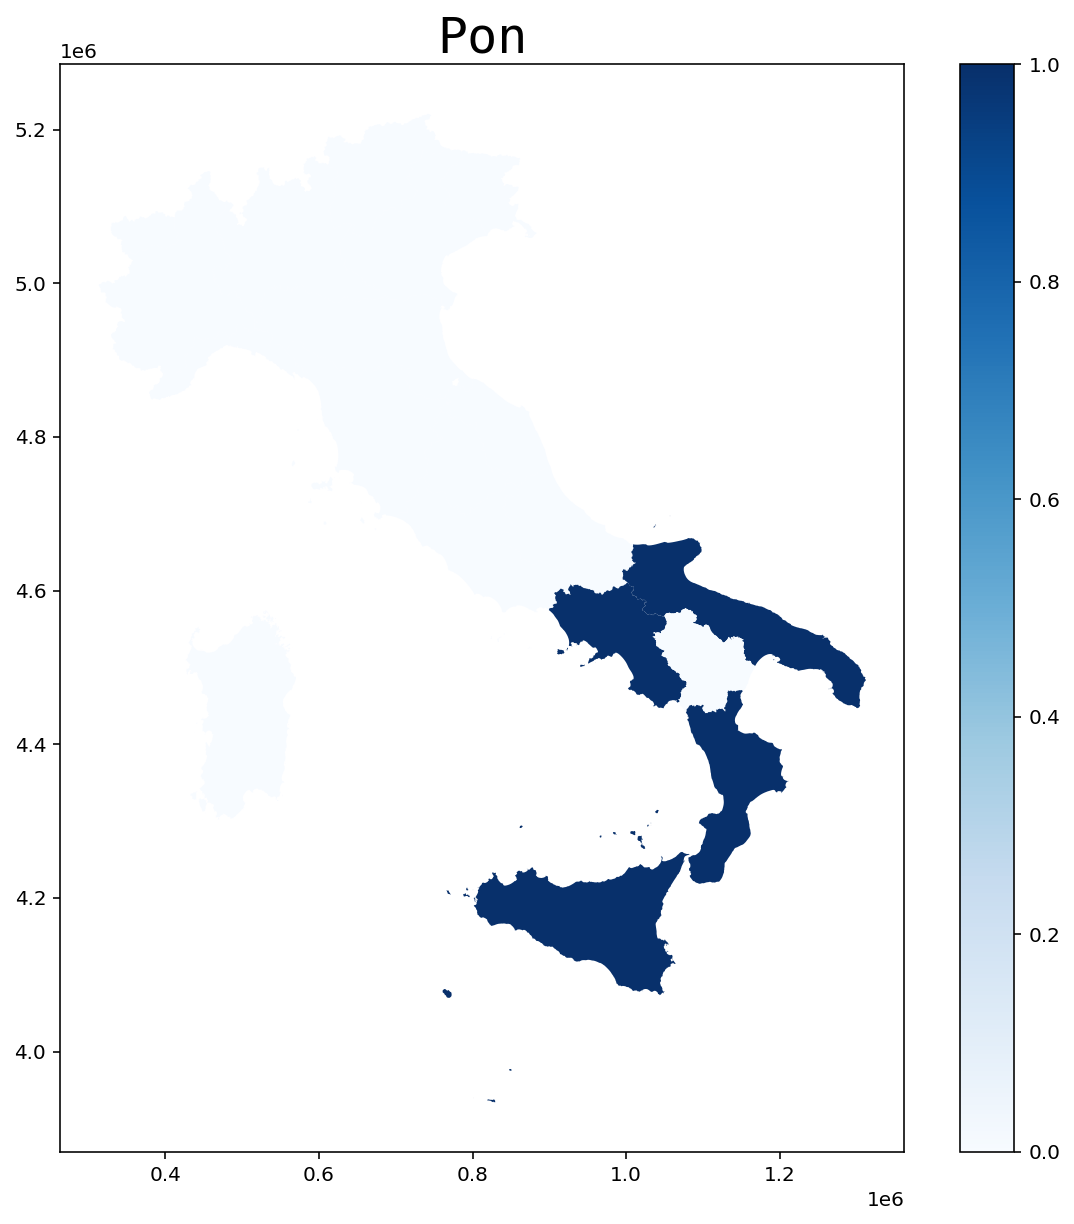

In [99]:
plot_variable('Pon')

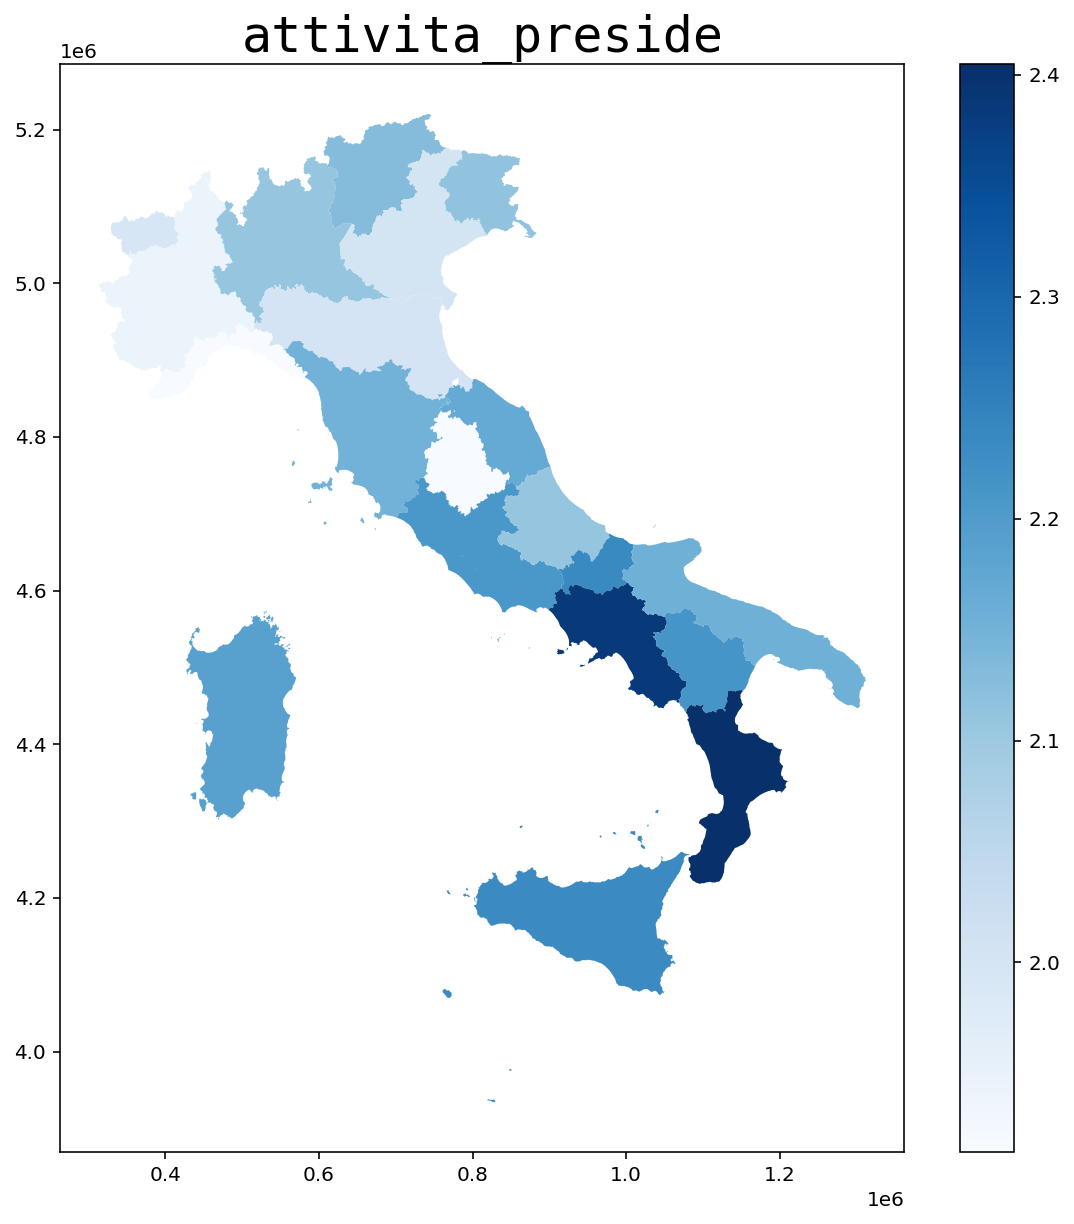

In [100]:
plot_variable('attivita_preside')

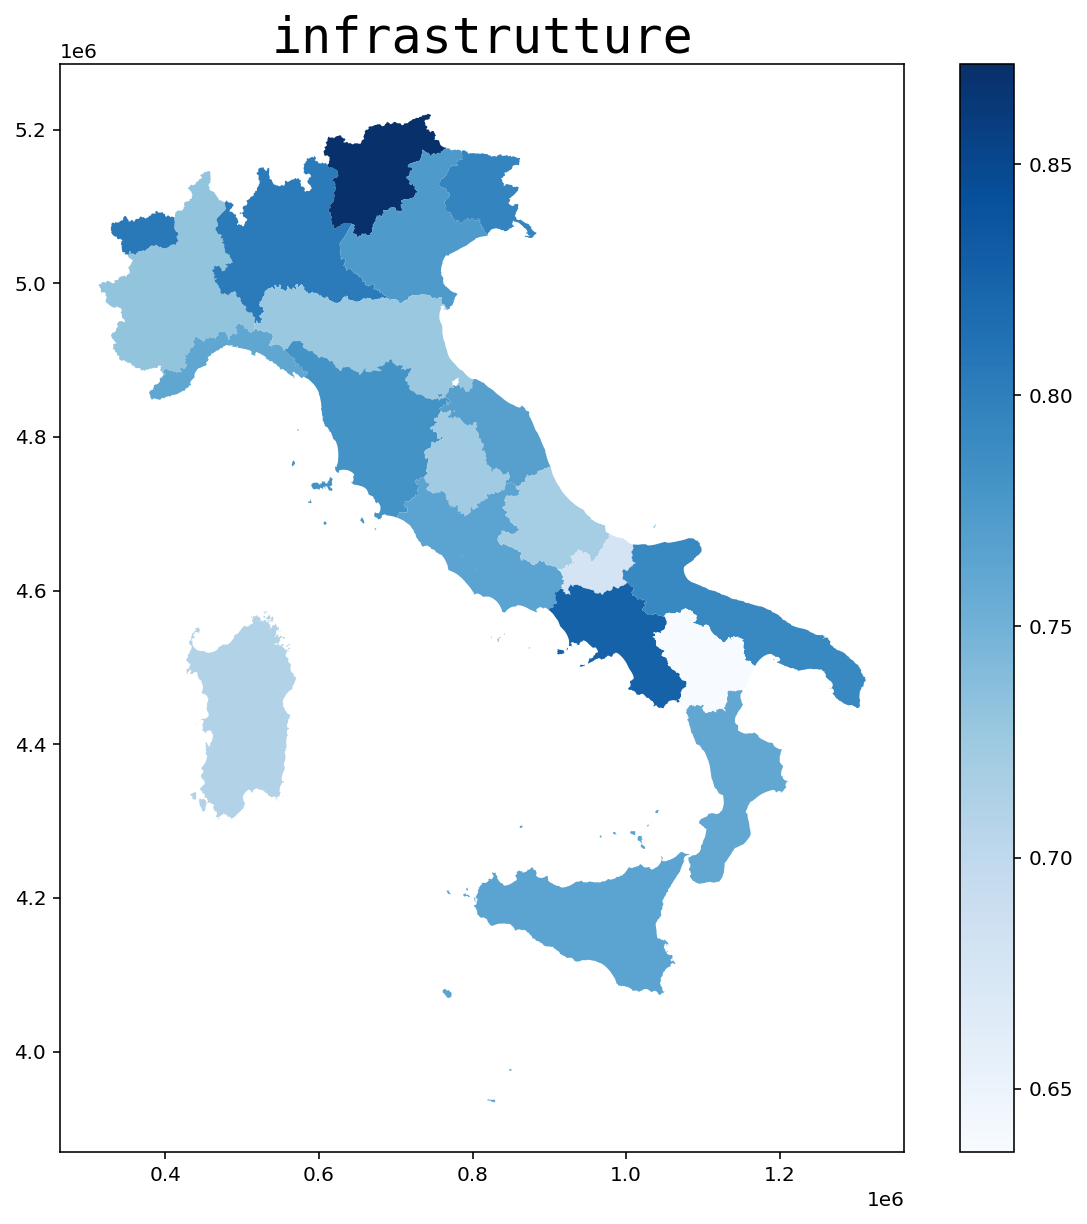

In [102]:
plot_variable('infrastrutture')

W can also visualize data at regional level, but we have problems with how the provinces are defined and we might not have data on some provinces, so
working on a provincial level is not adviced.

<AxesSubplot:>

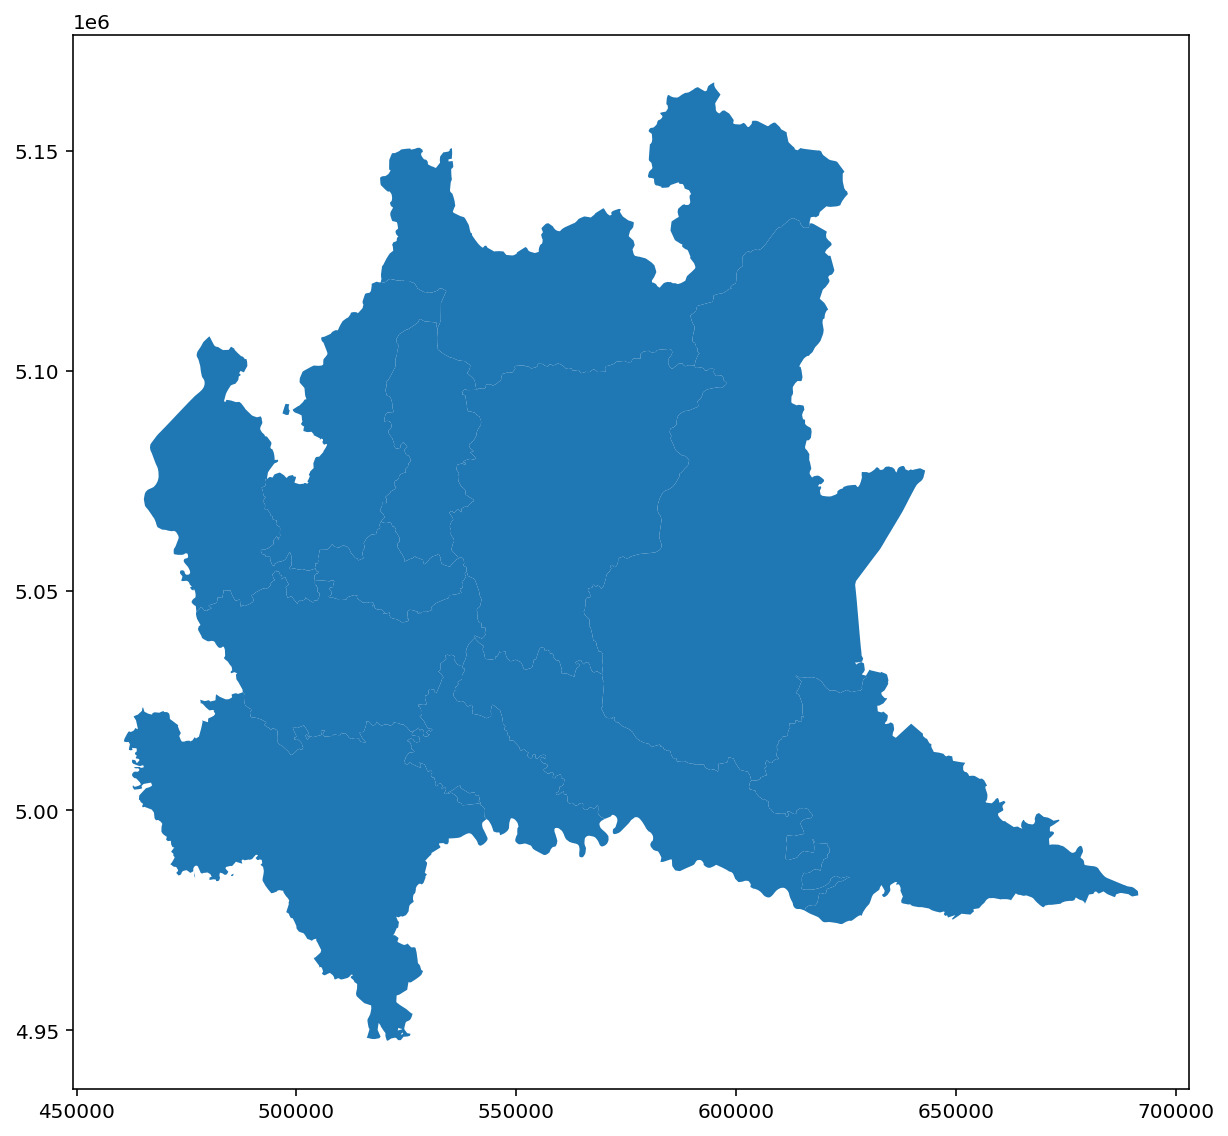

In [26]:
lombardy = gpd.read_file('Data\italian-maps-shapefiles-master/regions-with-provinces/lombardia/lombardia.shp')
lombardy.plot(figsize=(10, 10))

In [28]:

def plot_lombardy(string):
    province = df[df['Cod_reg'] == 'Lombardia'].groupby(by = ['prov']).mean()[string]
    province.index = ['BERGAMO','BRESCIA','COMO','CREMONA','LECCO','MILANO','MANTOVA', 'PAVIA','SONDRIO','VARESE']
    province = pd.DataFrame(province)
    merge = lombardy.merge(province, left_on = 'NOME_PRO', right_index = True)

    fig, ax = plt.subplots(1, figsize=(10, 10))
    col = string

    ax.set_title(
    col, 
    fontdict={'fontsize':'25', 'fontweight':3}, 
    color='Black', 
    fontfamily='monospace')

    merge.plot(
    ax=ax,
    column=col,
    cmap='Reds',
    label='ciao',
    legend=True,
    categorical=False
    )

In [37]:
df

,cod_scu_anonimo,opinione_invalsi,utilizzo_invalsi,discussi_insegnanti,discussi_genitori,sodd_pon,attivita_preside,pressioni_genitori,coinvolgimento_genitori_prop,opinione_associazioni_genitori,coinvolgimento_genitori_eff,condotta_studenti,registro_elettronico,numero_plessi,infrastrutture,strumenti,preside_maschio,eta_preside,voto_scritto_ita,voto_scritto_mat,voto_scritto_ita_cont,voto_scritto_mat_cont,prov,Nome_reg,Pon,Fattore_correzione,attributo,TIPO_SCUOLA,Cod_reg,Areageo_3,Areageo_4,Areageo_5,Areageo_5_Istat,statale,paritaria,Nord,Centro,Sud,school_score_ita,school_score_mate,school_escs,class_tot,class_fem,prop_fem,class_imm1,prop_imm1,class_imm2,prop_imm2,class_late,prop_late,public,voto_orale_ita_mean,voto_orale_ita_std,voto_orale_ita_skew,voto_orale_ita_min,voto_orale_ita_max,voto_orale_ita_median,voto_orale_ita_q25,voto_orale_ita_q75,voto_orale_mat_mean,voto_orale_mat_std,voto_orale_mat_skew,voto_orale_mat_min,voto_orale_mat_max,voto_orale_mat_median,voto_orale_mat_q25,voto_orale_mat_q75,voto_orale_ita_cont_mean,voto_orale_ita_cont_std,voto_orale_ita_cont_skew,voto_orale_ita_cont_min,voto_orale_ita_cont_max,voto_orale_ita_cont_median,voto_orale_ita_cont_q25,voto_orale_ita_cont_q75,voto_orale_mat_cont_mean,voto_orale_mat_cont_std,voto_orale_mat_cont_skew,voto_orale_mat_cont_min,voto_orale_mat_cont_max,voto_orale_mat_cont_median,voto_orale_mat_cont_q25,voto_orale_mat_cont_q75,pu_ma_gr_mean,pu_ma_gr_std,pu_ma_gr_skew,pu_ma_gr_min,pu_ma_gr_max,pu_ma_gr_median,pu_ma_gr_q25,pu_ma_gr_q75,pu_ma_no_mean,pu_ma_no_std,pu_ma_no_skew,pu_ma_no_min,pu_ma_no_max,pu_ma_no_median,pu_ma_no_q25,pu_ma_no_q75,part_1_gr_mean,part_1_gr_std,part_1_gr_skew,part_1_gr_min,part_1_gr_max,part_1_gr_median,part_1_gr_q25,part_1_gr_q75,part_1_no_mean,part_1_no_std,part_1_no_skew,part_1_no_min,part_1_no_max,part_1_no_median,part_1_no_q25,part_1_no_q75,part_2_gr_mean,part_2_gr_std,part_2_gr_skew,part_2_gr_min,part_2_gr_max,part_2_gr_median,part_2_gr_q25,part_2_gr_q75,part_2_no_mean,part_2_no_std,part_2_no_skew,part_2_no_min,part_2_no_max,part_2_no_median,part_2_no_q25,part_2_no_q75,part_3_gr_mean,part_3_gr_std,part_3_gr_skew,part_3_gr_min,part_3_gr_max,part_3_gr_median,part_3_gr_q25,part_3_gr_q75,part_3_no_mean,part_3_no_std,part_3_no_skew,part_3_no_min,part_3_no_max,part_3_no_median,part_3_no_q25,part_3_no_q75,part_4_gr_mean,part_4_gr_std,part_4_gr_skew,part_4_gr_min,part_4_gr_max,part_4_gr_median,part_4_gr_q25,part_4_gr_q75,part_4_no_mean,part_4_no_std,part_4_no_skew,part_4_no_min,part_4_no_max,part_4_no_median,part_4_no_q25,part_4_no_q75,proc_1_gr_mean,proc_1_gr_std,proc_1_gr_skew,proc_1_gr_min,proc_1_gr_max,proc_1_gr_median,proc_1_gr_q25,proc_1_gr_q75,proc_2_gr_mean,proc_2_gr_std,proc_2_gr_skew,proc_2_gr_min,proc_2_gr_max,proc_2_gr_median,proc_2_gr_q25,proc_2_gr_q75,proc_3_gr_mean,proc_3_gr_std,proc_3_gr_skew,proc_3_gr_min,proc_3_gr_max,proc_3_gr_median,proc_3_gr_q25,proc_3_gr_q75,proc_1_no_mean,proc_1_no_std,proc_1_no_skew,proc_1_no_min,proc_1_no_max,proc_1_no_median,proc_1_no_q25,proc_1_no_q75,proc_2_no_mean,proc_2_no_std,proc_2_no_skew,proc_2_no_min,proc_2_no_max,proc_2_no_median,proc_2_no_q25,proc_2_no_q75,proc_3_no_mean,proc_3_no_std,proc_3_no_skew,proc_3_no_min,proc_3_no_max,proc_3_no_median,proc_3_no_q25,proc_3_no_q75,WLE_MAT_200_mean,WLE_MAT_200_std,WLE_MAT_200_skew,WLE_MAT_200_min,WLE_MAT_200_max,WLE_MAT_200_median,WLE_MAT_200_q25,WLE_MAT_200_q75,WLE_MAT_200_CORR_mean,WLE_MAT_200_CORR_std,WLE_MAT_200_CORR_skew,WLE_MAT_200_CORR_min,WLE_MAT_200_CORR_max,WLE_MAT_200_CORR_median,WLE_MAT_200_CORR_q25,WLE_MAT_200_CORR_q75,mate8_mean,mate8_std,mate8_skew,mate8_min,mate8_max,mate8_median,mate8_q25,mate8_q75,pu_it_gr_mean,pu_it_gr_std,pu_it_gr_skew,pu_it_gr_min,pu_it_gr_max,pu_it_gr_median,pu_it_gr_q25,pu_it_gr_q75,pu_it_no_mean,pu_it_no_std,pu_it_no_skew,pu_it_no_min,pu_it_no_max,pu_it_no_median,pu_it_no_q25,pu_it_no_q75,WLE_ITA_200_mean,WLE_ITA_200_std,WLE_ITA_200_skew,WLE_ITA_200_min,WLE_ITA_200_max,WLE_ITA_200_median,WLE_ITA_200_q25,WLE_ITA_200

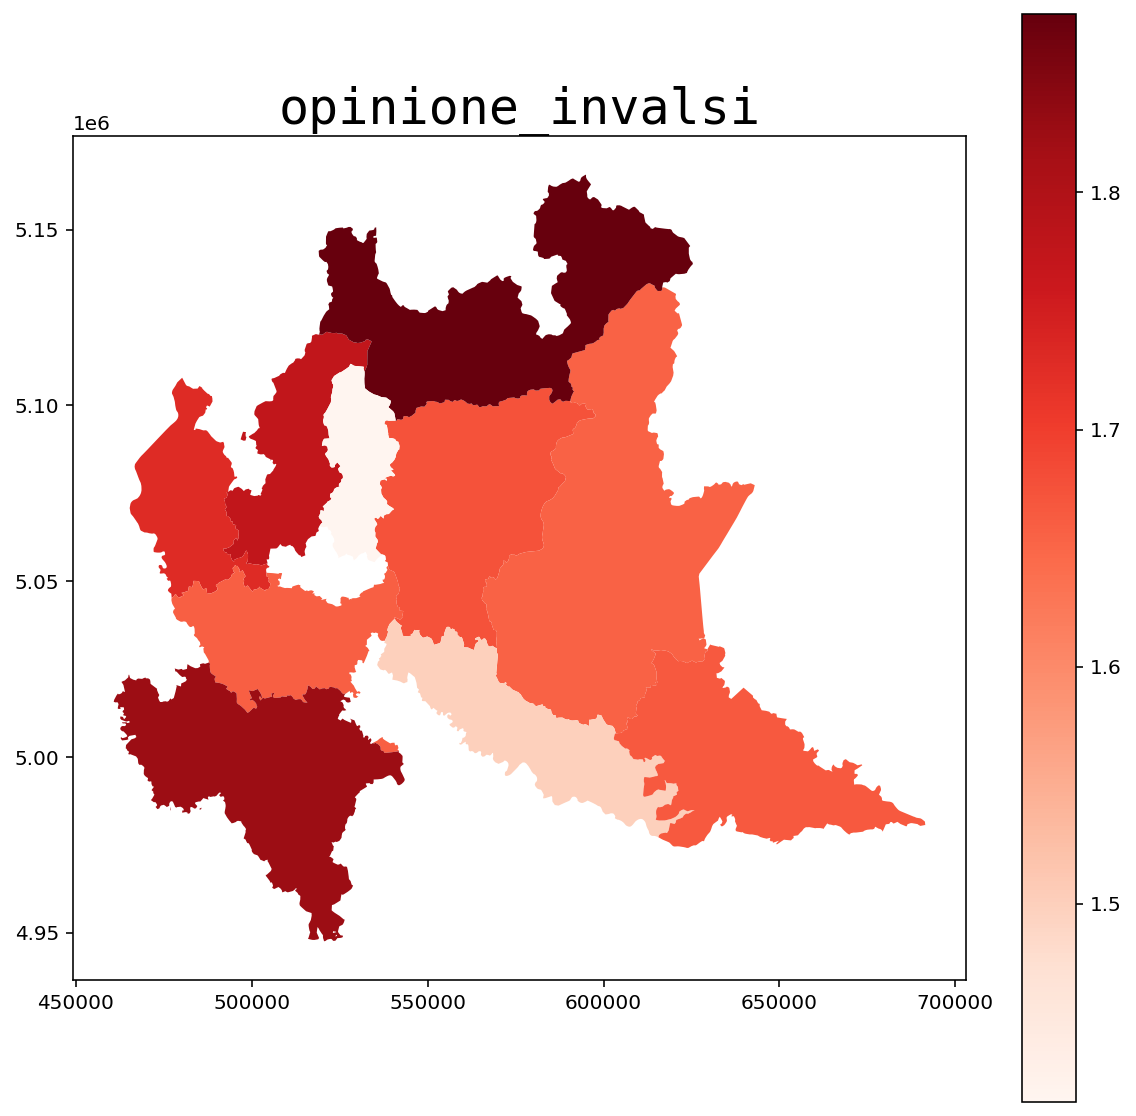

In [46]:
plot_lombardy('opinione_invalsi')

In [269]:
lombardy

,COD_REG,COD_PRO,NOME_PRO,SHAPE_Leng,SHAPE_Area,geometry
0,3,13,COMO,260843.128783,1.279089e+09,"MULTIPOLYGON (((521630.187 5120831.002, 521739..."
1,3,12,VARESE,245849.447397,1.199042e+09,"POLYGON ((483154.593 5104805.000, 483341.500 5..."
2,3,15,MILANO,309551.691373,1.575269e+09,"MULTIPOLYGON (((495404.523 5054547.920, 495509..."
3,3,18,PAVIA,450740.523680,2.968156e+09,"MULTIPOLYGON (((488156.944 5026523.092, 488089..."
4,3,16,BERGAMO,311027.307255,2.745545e+09,"POLYGON ((585372.000 5104682.001, 585498.437 5..."
5,3,17,BRESCIA,446983.163682,4.788497e+09,"POLYGON ((615380.000 5132540.001, 615458.001 5..."
6,3,14,SONDRIO,463732.642719,3.194588e+09,"POLYGON ((595736.187 5163715.001, 596126.251 5..."
7,3,19,CREMONA,366194.655471,1.768850e+09,"POLYGON ((542272.999 5037561.001, 542491.811 5..."
8,3,20,MANTOVA,386614.325919,2.340971e+09,"POLYGON ((630623.077 5031867.982, 632904.000 5..."
9,3,108,MONZA E DELLA BRIANZA,126136.532417,4.055762e+08,"POLYGON ((519838.001 5065441.000, 520283.000 5..."
